<a href="https://colab.research.google.com/github/TW-ZJLin/ImageProcessing/blob/main/ImageProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Package

In [16]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

## Connect to Google Cloud

In [17]:
drive.mount('/content/drive/')
%cd /content/drive/My Drive/Colab Notebooks/DATA

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Colab Notebooks/DATA


## ImRead and Gray Scale

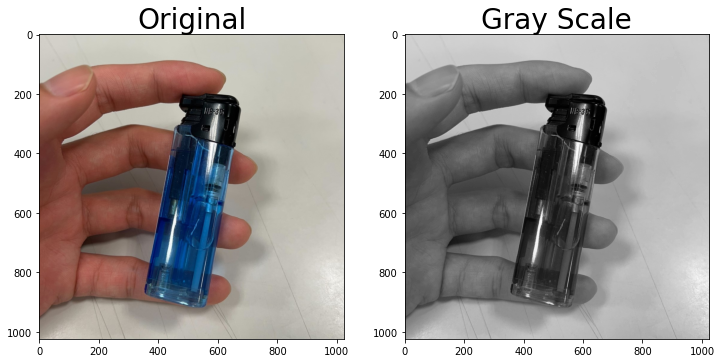

In [35]:
img = cv.imread('/content/drive/My Drive/Colab Notebooks/Figures/lighter.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) # Gray Scale

fig,axes=plt.subplots(1,2,figsize=(12,6))
axes[0].imshow( img[:,:,::-1] ); axes[0].set_title( 'Original', fontsize='28' ); # OpenCV default: BGR, [:,:,::-1] to RGB
axes[1].imshow( img_gray, cmap='gray' ); axes[1].set_title( 'Gray Scale', fontsize='28' );
plt.show()

## Color Space Conversion

In [19]:
img_HSV = cv.cvtColor(img, cv.COLOR_BGR2HSV) # Hue, Saturation, Value
img_HLS = cv.cvtColor(img, cv.COLOR_BGR2HLS) # Hue, lightness, Saturation
img_GRAY = cv.cvtColor(img, cv.COLOR_BGR2GRAY) # Gray Scale
img_CIEXYZ = cv.cvtColor(img, cv.COLOR_BGR2XYZ) # CIE 1931 XYZ
img_CIELAB = cv.cvtColor(img, cv.COLOR_BGR2Lab) # CIE L*a*b*

## Black and White Conversion

In [20]:
# Convert Black to White ( [ 0, 0, 0 ] to [ 255, 255, 255 ] )
def Black2White(img):
  img_sum = np.sum( img, axis=2, keepdims=True)
  img_sum[img_sum!=0] = -1
  img_sum = (img_sum+1)*255
  return img+img_sum

# Convert White to Black ( [ 255, 255, 255 ] to [ 0, 0, 0 ] )
def White2Black(img):
  img_sum = np.sum( img, axis=2, keepdims=True)
  img_sum[img_sum!=765] = 0
  img_sum[img_sum==765] = -255
  return img+img_sum

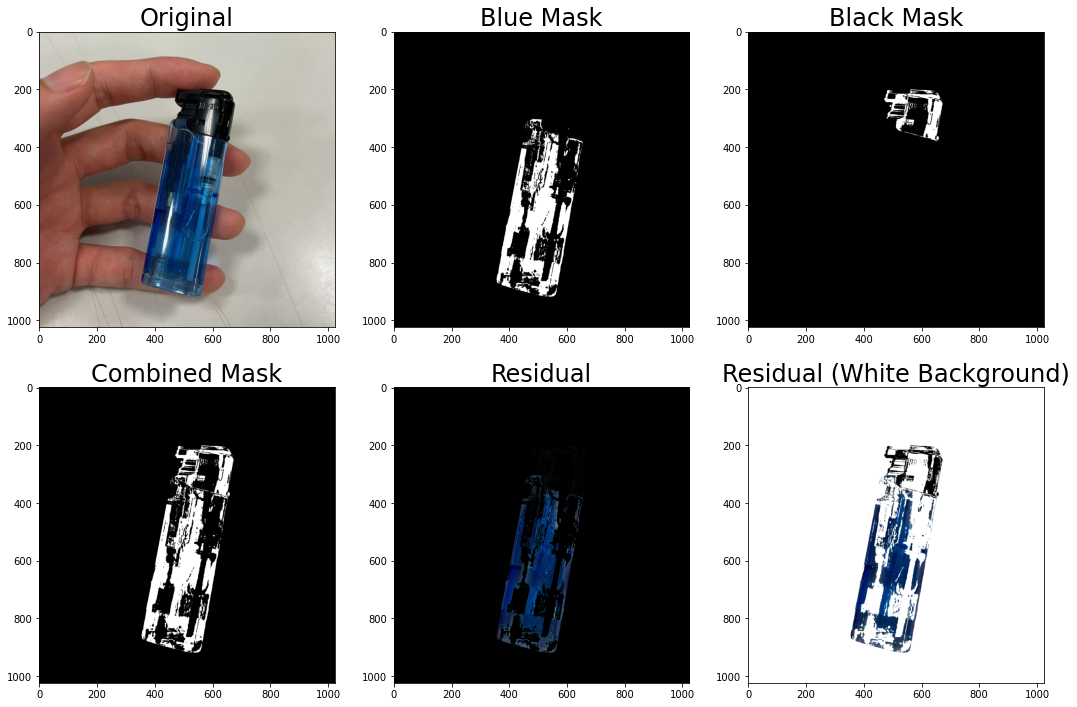

In [21]:
sensitivity = 15

# define range of blue color in HSV
lower_blue = np.array([ 120-sensitivity, 50, 50 ])
upper_blue = np.array([ 120+sensitivity, 255, 255 ])
mask_blue = cv.inRange(img_HSV, lower_blue, upper_blue)

# define range of black color in RGB
lower_black = np.array([ 0, 0, 0 ])
upper_black = np.array([ sensitivity, sensitivity, sensitivity ])
mask_black = cv.inRange(img, lower_black, upper_black)

mask = cv.bitwise_or(mask_blue, mask_black)

img_res = cv.bitwise_and( img, img, mask = mask)

img_res_white = Black2White(img_res) # Convert [ 0, 0, 0 ] to [ 255, 255, 255 ]

fig,axes=plt.subplots(2,3,figsize=(18,12))
font_size = '24'
axes[0,0].imshow( img[:,:,::-1] ); axes[0,0].set_title( 'Original', fontsize=font_size );
axes[0,1].imshow( mask_blue, cmap='gray' ); axes[0,1].set_title( 'Blue Mask', fontsize=font_size );
axes[0,2].imshow( mask_black, cmap='gray' ); axes[0,2].set_title( 'Black Mask', fontsize=font_size );
axes[1,0].imshow( mask, cmap='gray' ); axes[1,0].set_title( 'Combined Mask', fontsize=font_size );
axes[1,1].imshow( img_res[:,:,::-1] ); axes[1,1].set_title( 'Residual', fontsize=font_size );
axes[1,2].imshow( img_res_white[:,:,::-1] ); axes[1,2].set_title( 'Residual (White Background)', fontsize=font_size );

## Morphology

In [22]:
kernel_size = 5

kernel_ellipse = cv.getStructuringElement(cv.MORPH_ELLIPSE,(kernel_size,kernel_size))
print("Elliptical Kernel:")
print(kernel_ellipse)

kernel_rect = cv.getStructuringElement(cv.MORPH_RECT,(kernel_size,kernel_size))
print("Rectangular Kernel:")
print(kernel_rect)

kernel_cross = cv.getStructuringElement(cv.MORPH_CROSS,(kernel_size,kernel_size))
print("Cross-Shaped Kernel:")
print(kernel_cross)

Elliptical Kernel:
[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]
Rectangular Kernel:
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
Cross-Shaped Kernel:
[[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]


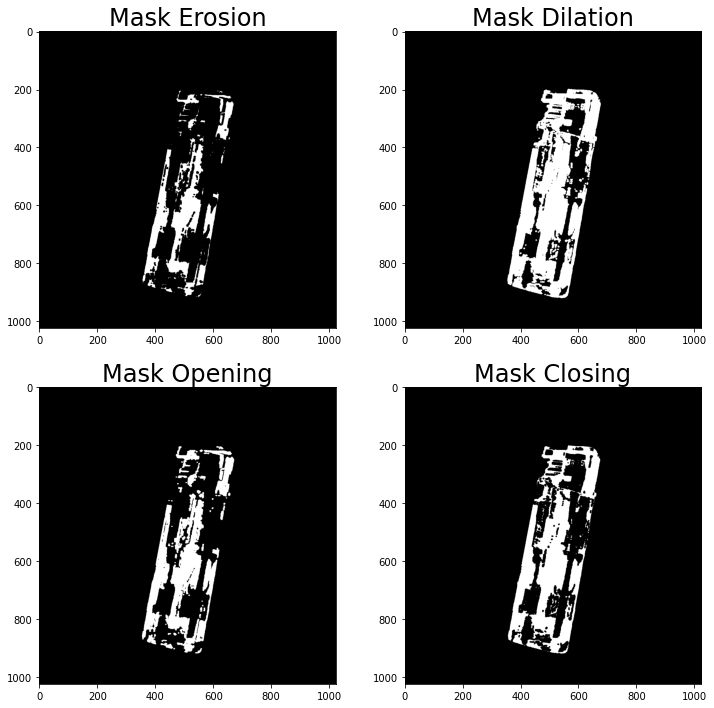

In [33]:
# Erosion
mask_erode = cv.erode(mask, kernel_ellipse)

# Dilation
mask_dilate = cv.dilate(mask, kernel_ellipse)

# Opening
mask_open = cv.dilate(cv.erode(mask, kernel_ellipse), kernel_ellipse)

# Closing
mask_close = cv.erode(cv.dilate(mask, kernel_ellipse), kernel_ellipse)

font_size = '24'
# fig,axes=plt.subplots(1,5,figsize=(18,3.6))
# axes[0].imshow( mask, cmap='gray' ); axes[0].set_title( 'Original Mask', fontsize=font_size );
# axes[1].imshow( mask_erode, cmap='gray' ); axes[1].set_title( 'Mask Erosion', fontsize=font_size );
# axes[2].imshow( mask_dilate, cmap='gray' ); axes[2].set_title( 'Mask Dilation', fontsize=font_size );
# axes[3].imshow( mask_open, cmap='gray' ); axes[3].set_title( 'Mask Opening', fontsize=font_size );
# axes[4].imshow( mask_close, cmap='gray' ); axes[4].set_title( 'Mask Closing', fontsize=font_size );

fig,axes=plt.subplots(2,2,figsize=(12,12))
axes[0,0].imshow( mask_erode, cmap='gray' ); axes[0,0].set_title( 'Mask Erosion', fontsize=font_size );
axes[0,1].imshow( mask_dilate, cmap='gray' ); axes[0,1].set_title( 'Mask Dilation', fontsize=font_size );
axes[1,0].imshow( mask_open, cmap='gray' ); axes[1,0].set_title( 'Mask Opening', fontsize=font_size );
axes[1,1].imshow( mask_close, cmap='gray' ); axes[1,1].set_title( 'Mask Closing', fontsize=font_size );

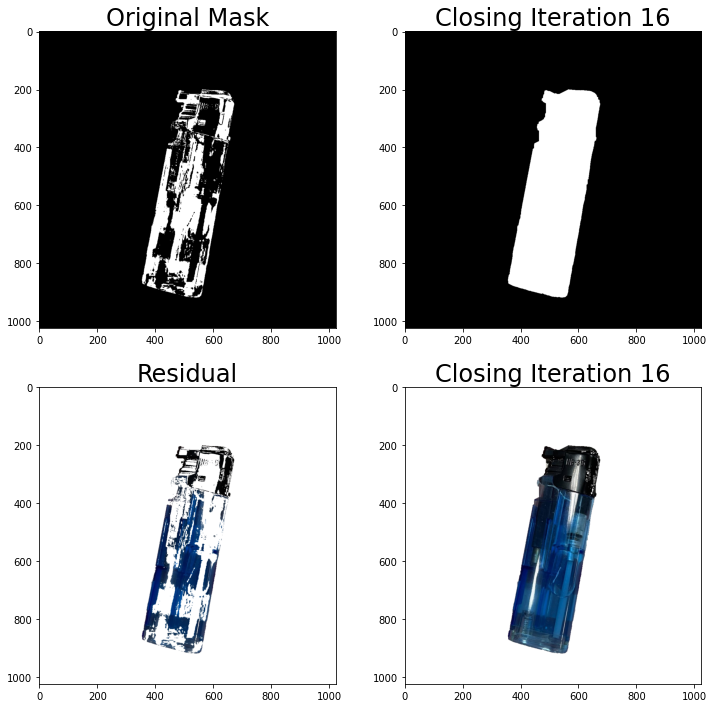

In [24]:
def mask_closing(mask,kernel,iterations=1):
  mask = cv.dilate(mask, kernel, iterations=iterations)
  mask = cv.erode(mask, kernel, iterations=iterations)
  return mask

font_size = '24'

fig,axes=plt.subplots(2,2,figsize=(12,12))
axes[0,0].imshow( mask, cmap='gray' ); axes[0,0].set_title( 'Original Mask', fontsize=font_size );
axes[1,0].imshow( img_res_white[:,:,::-1], cmap='gray' ); axes[1,0].set_title( 'Residual', fontsize=font_size );

mask_closing16 = mask_closing(mask,kernel_ellipse,16)
img_closing16 = cv.bitwise_and( img, img, mask = mask_closing16 )[:,:,::-1]

axes[0,1].imshow( mask_closing16, cmap='gray' ); axes[0,1].set_title( 'Closing Iteration 16', fontsize=font_size );
axes[1,1].imshow( Black2White(img_closing16) ); axes[1,1].set_title( 'Closing Iteration 16', fontsize=font_size );

## Canny Edge Detection

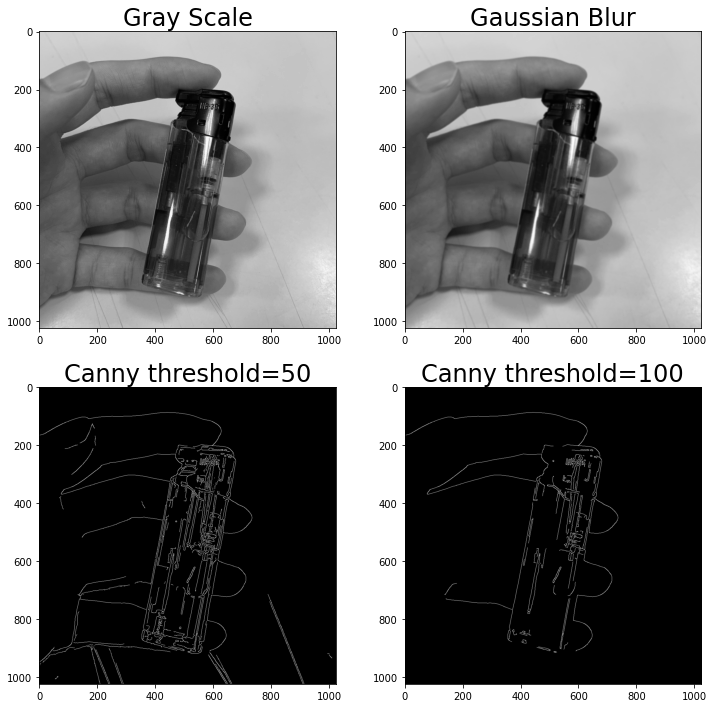

In [25]:
# Convert to Gray Scale
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Gaussian Blur Smoothing
kernel_size = 9
img_blur = cv.GaussianBlur(img_gray,(kernel_size, kernel_size), 0)

# Canny Edge Detection
low_threshold = 20
high_threshold = 50
img_canny = cv.Canny(img_blur, low_threshold, high_threshold)

low_threshold = 40
high_threshold = 100
img_canny2 = cv.Canny(img_blur, low_threshold, high_threshold)

fig,axes=plt.subplots(2,2,figsize=(12,12))
font_size = '24'
axes[0,0].imshow( img_gray, cmap='gray' ); axes[0,0].set_title( 'Gray Scale', fontsize=font_size );
axes[0,1].imshow( img_blur, cmap='gray' ); axes[0,1].set_title( 'Gaussian Blur', fontsize=font_size );
axes[1,0].imshow( img_canny, cmap='gray' ); axes[1,0].set_title( 'Canny threshold=50', fontsize=font_size );
axes[1,1].imshow( img_canny2, cmap='gray' ); axes[1,1].set_title( 'Canny threshold=100', fontsize=font_size );
plt.show()

## Thresholding (Binarization)

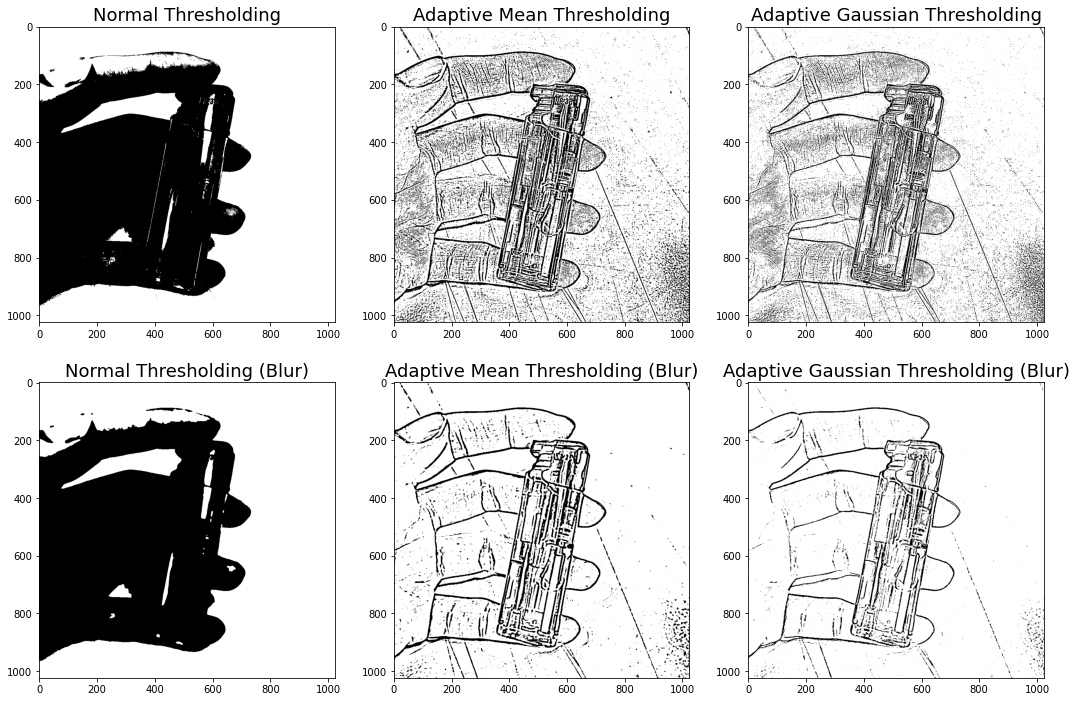

In [34]:
# Convert to Gray Scale
img_gray = cv.cvtColor( img, cv.COLOR_BGR2GRAY ) 

# Median Blur
blur_img_gray = cv.medianBlur( img_gray, 7 ) 

# Normal Thresholding (no blur)
ret, th1 = cv.threshold( img_gray, 127, 255, cv.THRESH_BINARY )

# Adaptive Mean Thresholding (no blur)
th2 = cv.adaptiveThreshold( img_gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2 ) # (blockSize, bias)

# Adaptive Gaussian Thresholding (no blur)
th3 = cv.adaptiveThreshold( img_gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2 ) # (blockSize, bias)

# Normal Thresholding (blur)
ret, th4 = cv.threshold( blur_img_gray, 127, 255, cv.THRESH_BINARY )

# Adaptive Mean Thresholding (blur)
th5 = cv.adaptiveThreshold( blur_img_gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2 ) # (blockSize, bias)

# Adaptive Gaussian Thresholding (blur)     
th6 = cv.adaptiveThreshold( blur_img_gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2 ) # (blockSize, bias)

fig,axes=plt.subplots(2,3,figsize=(18,12))
font_size = '18'
axes[0,0].imshow( th1, cmap='gray' ); axes[0,0].set_title( 'Normal Thresholding', fontsize=font_size );
axes[0,1].imshow( th2, cmap='gray' ); axes[0,1].set_title( 'Adaptive Mean Thresholding', fontsize=font_size );
axes[0,2].imshow( th3, cmap='gray' ); axes[0,2].set_title( 'Adaptive Gaussian Thresholding', fontsize=font_size );
axes[1,0].imshow( th4, cmap='gray' ); axes[1,0].set_title( 'Normal Thresholding (Blur)', fontsize=font_size );
axes[1,1].imshow( th5, cmap='gray' ); axes[1,1].set_title( 'Adaptive Mean Thresholding (Blur)', fontsize=font_size );
axes[1,2].imshow( th6, cmap='gray' ); axes[1,2].set_title( 'Adaptive Gaussian Thresholding (Blur)', fontsize=font_size );

## Results

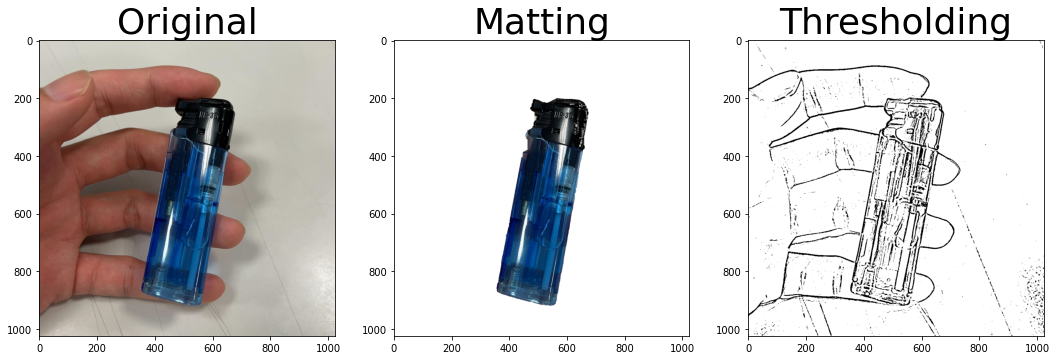

In [40]:
fig,axes=plt.subplots(1,3,figsize=(18,6))
font_size = '36'
axes[0].imshow( img[:,:,::-1] ); axes[0].set_title( 'Original', fontsize=font_size ); # OpenCV default: BGR, [:,:,::-1] to RGB
axes[1].imshow( Black2White(img_closing16) ); axes[1].set_title( 'Matting', fontsize=font_size );
axes[2].imshow( th6, cmap='gray' ); axes[2].set_title( 'Thresholding', fontsize=font_size );
plt.show()

### Gray Level

In [27]:
gray_level = np.zeros(256)
for i in range(img_gray.shape[0]):
  for j in range(img_gray.shape[1]):
    gray_level[ img_gray[i,j] ] += 1

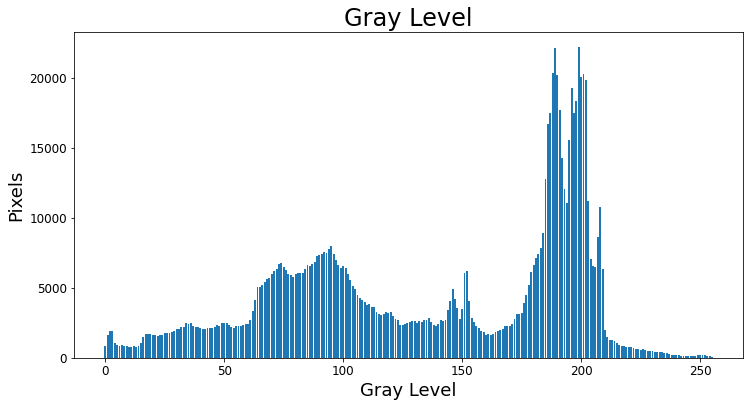

In [28]:
fig,axes=plt.subplots(1,1,figsize=(12,6))
axes.bar( np.arange(0,256,1), gray_level[::1], width = 0.8 )
plt.title('Gray Level', fontsize=24)
plt.xlabel('Gray Level', fontsize=18)
plt.ylabel('Pixels', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()